In [1]:
import pandas as pd
import numpy as np

In [2]:
data1=pd.read_csv("data.csv", delimiter='\t')

In [3]:
data1.head(5)

,Year,Sydney price Index,Annual % change,Total number of square meters,Age of house (years),Market Price ($000)
0,2002�03,78.2,0.0,160.5,35,636.75
1,2003�04,87.5,11.9,248.9,45,651.00
2,2004�05,84.1,3.9,155.3,20,699.00
3,2005�06,81.6,3.0,240.4,32,768.00
4,2006�07,83.6,2.5,188.4,25,739.00


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(data1, index=['Sydney price Index','Annual % change','Total number of square meters','Age of house (years)','Market Price ($000)'])

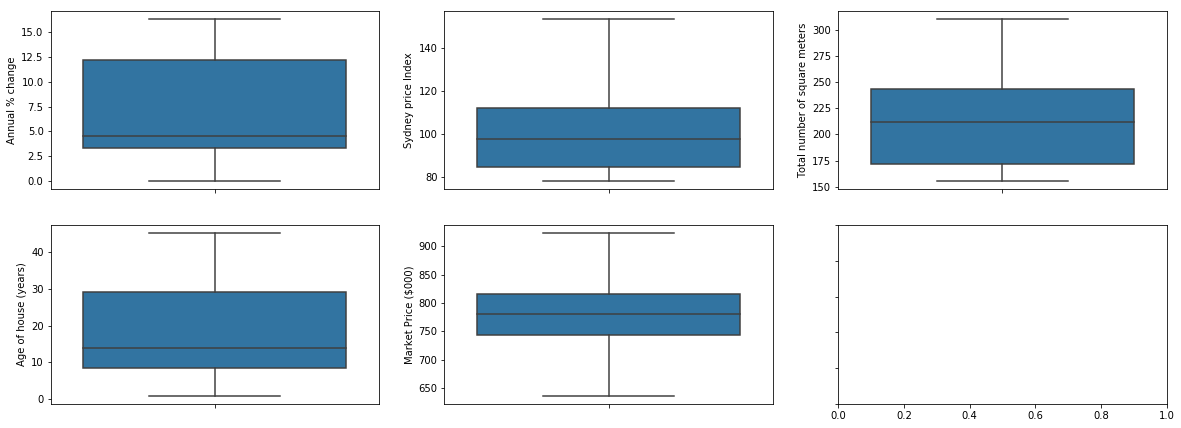

In [6]:

#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(20, 7), sharey=True)
#ax1 = fig.add_subplot(211)
ax1 = plt.subplot(2, 3, 1, frameon=True)
ax1 = sns.boxplot(y=data1["Annual % change"])
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=25)
#plt.show()
ax2 = plt.subplot(2, 3, 2, frameon=True)
ax2 = sns.boxplot(y=data1["Sydney price Index"])
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=20)
#plt.show()
ax3 = plt.subplot(2, 3, 3, frameon=True)
ax3 = sns.boxplot(y=data1["Total number of square meters"])
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=20)
#plt.show()
ax4 = plt.subplot(2, 3, 4, frameon=True)
ax4 = sns.boxplot(y=data1["Age of house (years)"])
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=20)
#plt.show()
ax5 = plt.subplot(2, 3,5, frameon=True)
ax5 = sns.boxplot(y=data1["Market Price ($000)"])
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=20)

plt.savefig('boxplot.png')

plt.show()


In [7]:
correlation=data1.corr()
correlation

,Sydney price Index,Annual % change,Total number of square meters,Age of house (years),Market Price ($000)
Sydney price Index,1.000000,0.683983,0.323584,-0.581084,0.771055
Annual % change,0.683983,1.000000,0.547415,-0.403228,0.406251
Total number of square meters,0.323584,0.547415,1.000000,-0.015025,0.317211
Age of house (years),-0.581084,-0.403228,-0.015025,1.000000,-0.682140
Market Price ($000),0.771055,0.406251,0.317211,-0.682140,1.000000


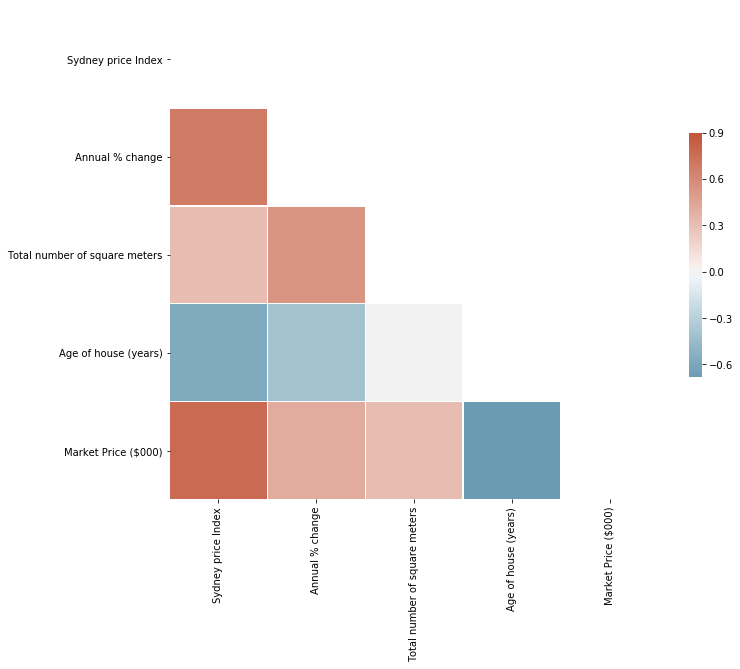

In [8]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
from sklearn import linear_model

In [12]:
X = data1[['Sydney price Index','Annual % change','Total number of square meters','Age of house (years)']]
y = data1['Market Price ($000)']

In [13]:
X.head(5)

,Sydney price Index,Annual % change,Total number of square meters,Age of house (years)
0,78.2,0.0,160.5,35
1,87.5,11.9,248.9,45
2,84.1,3.9,155.3,20
3,81.6,3.0,240.4,32
4,83.6,2.5,188.4,25


In [14]:
y.head(4)

0    636.75
1    651.00
2    699.00
3    768.00
Name: Market Price ($000), dtype: float64

In [15]:
regr = linear_model.LinearRegression()
fit1=regr.fit(X, y)

In [16]:
print(fit1.coef_)
print(fit1.intercept_)

[ 2.03286299 -5.8192431   0.5221378  -2.4654693 ]
543.4978879343182


In [17]:
fit1predict=fit1.predict([[80, 10,300,2]])

In [18]:
fit1predict

array([799.64489685])

In [19]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

D:\a\cc\ana\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                             OLS Regression Results                            
Dep. Variable:     Market Price ($000)   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     8.388
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):            0.00310
Time:                         13:25:02   Log-Likelihood:                -74.397
No. Observations:                   15   AIC:                             158.8
Df Residuals:                       10   BIC:                             162.3
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

D:\a\cc\ana\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [22]:
fit1predict=model.predict([[1,80, 10,300,2]])

In [23]:
fit1predict

array([799.64489685])